In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy.stats import beta
from scipy.stats import lognorm

In [ ]:
df = pd.read_excel('../data/블록-계획데이터(예제)_수정.xlsx')

In [ ]:
df

1. 선종_블록

In [ ]:
group_list = []
for i in range(12132):
    group_code = df.loc[i, '선종_코드'] + '_' + df.loc[i, '블록'][0]
    group_list.append(group_code)

In [ ]:
df['선종_블록'] = group_list

df

In [59]:
df.to_excel('../data/블록-계획데이터(예제)_블록 그룹 추가.xlsx')

In [ ]:
df_group_count = pd.DataFrame(df['선종_블록'].value_counts())

df_group_count

In [ ]:
df_group_count['proportion'] = df_group_count['count'] / df_group_count['count'].sum()

In [ ]:
df_group_count

In [ ]:
df_group_count.to_excel('../data/선종_블록 그룹 간 비율.xlsx')

In [ ]:
df_duration_plan = df[['선종_블록', '계획공기', 'H01', 'H02']]

df_duration_plan

In [ ]:
def making_model_duration_plan(code):
    df_group_duration = df_duration_plan[df_duration_plan['선종_블록'] == code]
    x = df_group_duration[['H01', 'H02']]
    y = df_group_duration['계획공기']

    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    print(str(code) + ' 회귀계수 : ' + str(reg.coef_))
    print(str(code) + ' 절편 : '+ str(reg.intercept_))

    df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_

    return df_group_duration

In [ ]:
df_example = making_model_duration_plan('CN_E')

In [ ]:
df_example

for code in df_group_count.index:
    df_fitted = making_model_duration_plan(code)
    file_path = '../data/작업 공기_다변수_' + str(code) + '.xlsx'
    df_fitted.to_excel(file_path)

In [ ]:
df_duration_plan[df_duration_plan['선종_블록'] == 'LN_T']

In [ ]:
df_duration_plan[df_duration_plan['선종_블록'] == 'CN_L']

2. 주요 제원에 대한 분포모델

In [57]:
# L

df_L = df[['선종_블록', 'L']]

df_L

,선종_블록,L
0,TK_S,20.0
1,CN_S,21.0
2,CN_S,21.0
3,CN_E,18.0
4,BC_F,23.0
...,...,...
12127,TK_S,20.0
12128,TK_S,20.0
12129,TK_S,20.0
12130,TK_S,17.5


In [60]:
# B

df_B = df[['선종_블록', 'B']]

# W

df_W = df[['선종_블록', 'W']]

In [61]:
df_B

,선종_블록,B
0,TK_S,11.5
1,CN_S,17.5
2,CN_S,17.5
3,CN_E,13.0
4,BC_F,17.5
...,...,...
12127,TK_S,6.0
12128,TK_S,7.5
12129,TK_S,6.0
12130,TK_S,17.0


In [62]:
df_W

,선종_블록,W
0,TK_S,0
1,CN_S,150
2,CN_S,150
3,CN_E,0
4,BC_F,126
...,...,...
12127,TK_S,0
12128,TK_S,0
12129,TK_S,0
12130,TK_S,0


In [152]:
df_H = df[['선종_블록', 'H']]

In [63]:
df_L.value_counts()

선종_블록  L   
CN_S   20.0    226
CN_E   13.5    201
       15.0    192
LN_B   19.0    190
CN_B   20.0    190
              ... 
PT_A   10.5      1
CN_A   8.0       1
PT_A   2.5       1
LP_E   21.0      1
CN_B   10.0      1
Name: count, Length: 573, dtype: int64

In [65]:
df_example = df_L[df_L['선종_블록'] == 'LP_E']

In [66]:
df_example

,선종_블록,L
7,LP_E,14.0
8,LP_E,14.0
75,LP_E,14.0
76,LP_E,14.0
92,LP_E,8.0
...,...,...
12047,LP_E,21.0
12048,LP_E,9.0
12071,LP_E,14.5
12072,LP_E,14.5


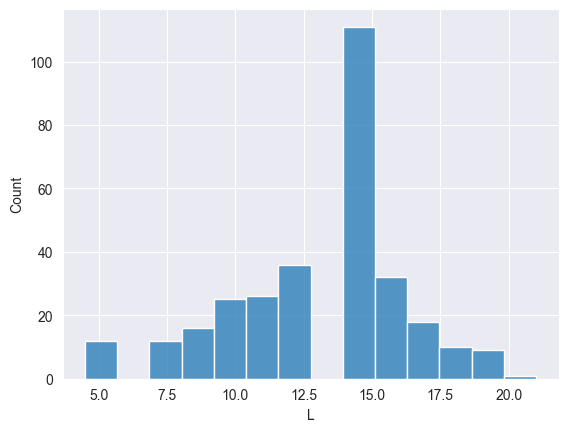

In [68]:
sns.histplot(data=df_example, x='L')
plt.show()

In [153]:
def making_model_property(property, code, fitting_method):
    if property == 'L':
        df_code = df_L[df_L['선종_블록'] == code]
        df_code_count = pd.DataFrame(df_code.value_counts())
        df_code_count.reset_index(inplace=True)
        df_code_count.sort_values('L', inplace=True)
        df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()

    elif property == 'B':
        df_code = df_B[df_B['선종_블록'] == code]
        df_code_count = pd.DataFrame(df_code.value_counts())
        df_code_count.reset_index(inplace=True)
        df_code_count.sort_values('B', inplace=True)
        df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()

    elif property == 'H':
        df_code = df_H[df_H['선종_블록'] == code]
        df_code_count = pd.DataFrame(df_code.value_counts())
        df_code_count.reset_index(inplace=True)
        df_code_count.sort_values('H', inplace=True)
        df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()

    if fitting_method == 'beta':
        df_forbeta = df_code_count[[property, 'Density']]
        array_forbeta = df_forbeta.to_numpy()
        a, b, loc, scale = beta.fit(array_forbeta)
        pdf_beta = beta.pdf(df_code_count[property], a, b, loc, scale)
        df_code_count['fitted_result'] = pdf_beta

    elif fitting_method == 'lognorm':
        df_lognorm = df_code_count[[property, 'Density']]
        array_lognorm = df_lognorm.to_numpy()
        s, loc, scale = lognorm.fit(array_lognorm[:, 1])
        pdf_lognorm = lognorm.pdf(df_code_count[property], s, loc, scale)
        df_code_count['fitted_result'] = pdf_lognorm

    return df_code_count

In [146]:
df_example = making_model_property('B', 'CN_B', 'beta')

In [147]:
df_example

,선종_블록,B,count,Density,fitted_result
28,CN_B,2.5,3,0.003145,0.059665
15,CN_B,3.0,13,0.013627,0.054664
1,CN_B,3.5,134,0.140461,0.050807
10,CN_B,4.0,32,0.033543,0.047724
16,CN_B,4.5,12,0.012579,0.045193
11,CN_B,5.0,24,0.025157,0.043072
2,CN_B,5.5,86,0.090147,0.041265
0,CN_B,6.0,192,0.201258,0.039707
14,CN_B,6.5,14,0.014675,0.038350
5,CN_B,7.0,40,0.041929,0.037156


In [154]:
for code in df_group_count.index:
    for property in ['L', 'B', 'H']:
        df_property_code = making_model_property(property, code, 'beta')
        file_path = '../data/블록 제원 피팅_' + code + '_' + property + '.xlsx'
        df_property_code.to_excel(file_path)

C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\sta

In [155]:
df_LBHW = df[['선종_블록', 'W', 'L', 'B', 'H']]
df_LBHW

,선종_블록,W,L,B,H
0,TK_S,0,20.0,11.5,8.5
1,CN_S,150,21.0,17.5,8.0
2,CN_S,150,21.0,17.5,8.0
3,CN_E,0,18.0,13.0,4.5
4,BC_F,126,23.0,17.5,6.0
...,...,...,...,...,...
12127,TK_S,0,20.0,6.0,8.5
12128,TK_S,0,20.0,7.5,8.5
12129,TK_S,0,20.0,6.0,8.5
12130,TK_S,0,17.5,17.0,8.0


In [156]:
df_LBHW['LBH'] = df_LBHW['L'] * df_LBHW['B'] * df_LBHW['H']

df_LBHW

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\165090667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LBHW['LBH'] = df_LBHW['L'] * df_LBHW['B'] * df_LBHW['H']


,선종_블록,W,L,B,H,LBH
0,TK_S,0,20.0,11.5,8.5,1955.0
1,CN_S,150,21.0,17.5,8.0,2940.0
2,CN_S,150,21.0,17.5,8.0,2940.0
3,CN_E,0,18.0,13.0,4.5,1053.0
4,BC_F,126,23.0,17.5,6.0,2415.0
...,...,...,...,...,...,...
12127,TK_S,0,20.0,6.0,8.5,1020.0
12128,TK_S,0,20.0,7.5,8.5,1275.0
12129,TK_S,0,20.0,6.0,8.5,1020.0
12130,TK_S,0,17.5,17.0,8.0,2380.0


In [157]:
def making_model_weight(code):
    df_weight = df_LBHW[df_LBHW['선종_블록'] == code]
    x = df_weight['LBH']
    x = x.to_numpy()
    x = x.reshape(-1, 1)
    y = df_weight['W']
    y = y.to_numpy()

    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_
    return df_weight

In [158]:
making_model_weight('TK_S')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_


,선종_블록,W,L,B,H,LBH,fitted_result
0,TK_S,0,20.0,11.5,8.5,1955.000,105.311348
15,TK_S,300,20.0,23.5,8.5,3995.000,296.734271
26,TK_S,0,17.5,7.5,8.5,1115.625,26.548791
27,TK_S,0,17.5,6.5,8.5,966.875,12.590869
28,TK_S,0,17.5,5.5,8.5,818.125,-1.367052
...,...,...,...,...,...,...,...
12127,TK_S,0,20.0,6.0,8.5,1020.000,17.575841
12128,TK_S,0,20.0,7.5,8.5,1275.000,41.503707
12129,TK_S,0,20.0,6.0,8.5,1020.000,17.575841
12130,TK_S,0,17.5,17.0,8.0,2380.000,145.191123


In [159]:
for code in df_group_count.index:
    df_fitted = making_model_weight(code)
    file_path = '../data/무게 적합_' + code + '.xlsx'
    df_fitted.to_excel(file_path)

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

In [160]:
df_H01 = df[['선종_블록', 'H01', 'W', 'L', 'B', 'H']]
df_H01

,선종_블록,H01,W,L,B,H
0,TK_S,312,0,20.0,11.5,8.5
1,CN_S,1469,150,21.0,17.5,8.0
2,CN_S,1469,150,21.0,17.5,8.0
3,CN_E,475,0,18.0,13.0,4.5
4,BC_F,623,126,23.0,17.5,6.0
...,...,...,...,...,...,...
12127,TK_S,315,0,20.0,6.0,8.5
12128,TK_S,641,0,20.0,7.5,8.5
12129,TK_S,315,0,20.0,6.0,8.5
12130,TK_S,35,0,17.5,17.0,8.0


In [161]:
df_H02 = df[['선종_블록', 'H02', 'W', 'L', 'B', 'H']]
df_H02

,선종_블록,H02,W,L,B,H
0,TK_S,649,0,20.0,11.5,8.5
1,CN_S,764,150,21.0,17.5,8.0
2,CN_S,766,150,21.0,17.5,8.0
3,CN_E,914,0,18.0,13.0,4.5
4,BC_F,386,126,23.0,17.5,6.0
...,...,...,...,...,...,...
12127,TK_S,0,0,20.0,6.0,8.5
12128,TK_S,0,0,20.0,7.5,8.5
12129,TK_S,0,0,20.0,6.0,8.5
12130,TK_S,35,0,17.5,17.0,8.0


In [162]:
def making_model_working(work, code):
    df_work = df[['선종_블록', work, 'W', 'L', 'B', 'H']]
    df_work_code = df_work[df_work['선종_블록'] == code]

    x = df_work_code[['W', 'L', 'B', 'H']]
    y = df_work_code[work]

    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    df_work_code['fitted_result'] = reg.coef_[0] * df_work_code['W'] + reg.coef_[1] * df_work_code['L'] + reg.coef_[2] * df_work_code['B'] + reg.coef_[3] * df_work_code['H'] + reg.intercept_
    return df_work_code

In [163]:
making_model_working('H01', 'TK_S')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2524054855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fitted_result'] = reg.coef_[0] * df_work_code['W'] + reg.coef_[1] * df_work_code['L'] + reg.coef_[2] * df_work_code['B'] + reg.coef_[3] * df_work_code['H'] + reg.intercept_


,선종_블록,H01,W,L,B,H,fitted_result
0,TK_S,312,0,20.0,11.5,8.5,234.100257
15,TK_S,1305,300,20.0,23.5,8.5,1183.442443
26,TK_S,613,0,17.5,7.5,8.5,249.295587
27,TK_S,538,0,17.5,6.5,8.5,262.383369
28,TK_S,40,0,17.5,5.5,8.5,275.471151
...,...,...,...,...,...,...,...
12127,TK_S,315,0,20.0,6.0,8.5,306.083059
12128,TK_S,641,0,20.0,7.5,8.5,286.451386
12129,TK_S,315,0,20.0,6.0,8.5,306.083059
12130,TK_S,35,0,17.5,17.0,8.0,141.970894


In [164]:
for code in df_group_count.index:
    for work in ['H01', 'H02']:
        df_work = making_model_working(work, code)
        file_path = '../data/작업량_' + code + '_' + work + '.xlsx'
        df_work.to_excel(file_path)

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2524054855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fitted_result'] = reg.coef_[0] * df_work_code['W'] + reg.coef_[1] * df_work_code['L'] + reg.coef_[2] * df_work_code['B'] + reg.coef_[3] * df_work_code['H'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2524054855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fitted_result'] = reg.coef_[0] * df_work_code['W'] + reg.coef_[1] * df_work_code['L